# Module: M507A Methods of Prediction

# Name : Ishak Hafdallah
# GH Number: GH1024559


# Problem statement


## Underlying Business Problem
> As a data scientist working at CommuniSign, a company that specializes in developing technologies, for the deaf and hard of hearing community my role involves improving our sign language recognition system. Our aim is to make the process of recognizing American Sign Language (ASL) gestures efficient using a machine learning model.


## Importance
>Recognizing sign language effectively plays a role in bridging the communication divide between the community and those unfamiliar with sign language. By enhancing this system CommuniSign strives to offer an more dependable experience across applications such as educational tools, customer service interfaces and social interactions.


> Our primary objective is to identify the ASL letter corresponding to each hand gesture image.


## Benefits to the Company
**Revenue Growth**; By providing an improved sign language recognition tool we anticipate attracting users and clients resulting in increased sales and subscription rates.
**Improved User Experience**; Enhancing accuracy and efficiency in recognition will lead to user satisfaction levels. Increased loyalty.
**Advantage**; Through advancements we aim to outperform competitors in the assistive technology market.
**Social Impact**; By facilitating communication accessibility, for the community we contribute to broader social inclusion efforts.

## Data Collection
> The information gathered for this task pertains to the Sign Language MNIST dataset, which comprises pictures of hand signs representing 24 ASL letters (excluding J and Z which involve movement). This dataset, available, to the public contains labeled images that're ideal, for training and assessing a machine learning system.


>Available here:[Sign Language Mnist Dataset from Kaggel](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)
## Problem Formulation
>This assignment can be framed as a Multi Class Classification challenge. The goal is to create a  model of categorizing images of ASL hand signs into one of the 24 categories.






![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*B0VYVuEc9TkE-0Pv)


#Pipeline Structure
* Importing Libraries and Load the data
* Preprocessing
     * Set the class names
     * Data augmentation
* Data Exploration
    * Plotted the occurrences for each label
* Model Training & Experimenting
     * Traditional Model
     * 1st Experiment: Basic NN
     * 2nd Experiment: Basic CNN
     * 3rd Experiment: Change optimizer
     * 4th Experiment: Add More layers
     * 5th Experiment: Add and change dropouts
     * 6th Experiment: Change Conv2D filtring
     * 7th Experiment:Conv2D and MaxPooling2D Hyperparameters
     * 8th Experiment: Add Dense layer
     * 9th Experiment: Add Learning Rate Reduction
     * 10th Experiment: Change batch Size
     * 11th Experiment: Using The data Augmentation
* Results of the Experiment
     * Fonction to evaluate the Modules
     * Evaluate The Modules
* Model Assessment
     *  Plot images to evaluate the model's predictions
     * Plot training history, showing the training vs validation Loss and Accuracy
     * Confusion Matrix
* Final Discussion

# Import Libraries and Load the data

* Here, I will import all the necessary Libraries

In [ ]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import seaborn as sns
import time
from keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical

* First, I will Load the data directly from Kaggle and then Unzip the file

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle')

!kaggle datasets download -d datamunge/sign-language-mnis
with zipfile.ZipFile('sign-language-mnist.zip', 'r') as zip_ref:
    zip_ref.extractall('sign-language-mnist')

print("Dataset downloaded and unzipped successfully.")


Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
100%|██████████████████████████████████████| 62.6M/62.6M [00:05<00:00, 10.1MB/s]
100%|██████████████████████████████████████| 62.6M/62.6M [00:05<00:00, 11.2MB/s]
Dataset downloaded and unzipped successfully.


# PreProcessing

>I read the CSV file here with the function `read_csv` and then showed the first five lines of the dataset

In [ ]:
train_df = pd.read_csv('/Users/macos/Desktop/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('/Users/macos/Desktop/sign_mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


* As I can see below, there are 27,455 training images that we can use

* It consists of 784-pixel values for each image
* The train data is on a size of 164.4 MB

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


* Convert `train_df` and `test_df` into a numpy arrays:
  * `X_train` and  `y_train` containing the features
  * `train_lable` and `test_label` containing the labels

* Convert categorical labels( `train_lable` , `test_label`) into binary vectors using the function `LabelBinarizer()`
* Reshape the features into a 3D array, which is the required input to the first layer of the NN
* Normalize the pixel values of the features by 255 so that the value will range from 0 to 1

In [ ]:
X_train = train_df.drop(['label'],axis=1).values
train_label=train_df['label'].values

X_test=test_df.drop(['label'],axis=1).values
test_label=test_df['label'].values

lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

X_train = X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

X_train = X_train / 255.0
X_test = X_test / 255.0


* Here, I checked the shape of each feature and label

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


> Since The label of the data are the character, here i set the class names of each label to use it after

In [ ]:
class_names = [
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S',
    'T', 'U', 'V', 'W', 'X', 'Y'
]

> i  used the Data Augmentation here, in order to prevent overfittung,The idea is to alter the training data with small transformations to reproduce the variations

Below as follows the code each transformation and what it does:
* set input mean to 0 over the dataset
* set each sample mean to 0
* divide inputs by std of the dataset
* divide each input by its std
* apply ZCA whitening
* randomly rotate images in the range (degrees, 0 to 180)
* Randomly zoom image
* randomly shift images horizontally (fraction of total width)
* randomly shift images vertically (fraction of total height)
* randomly flip images

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

datagen.fit(X_train)

# Data exploration

* The labels range from 1 to 24 and correspond to the characters of the sign language alphabet for the English language, except for Z and J, as they require movement and cannot be encoded.

In [ ]:
unique_value = np.array(train_label)
np.unique(unique_value)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Making Sure that there's no missing values

In [ ]:
print(np.isnan(X_train).sum())

0


> I have plotted the occurrences for each label, and the dataset appears balanced for each training label, so it does not require any balancing technique

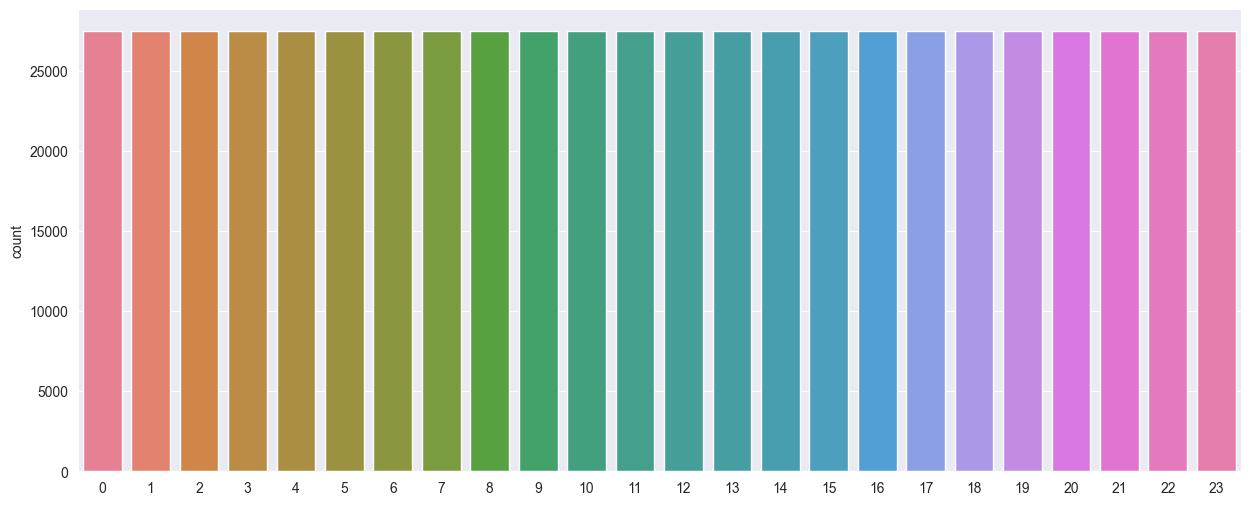

In [ ]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid");
sns.countplot(y_train);

> I ploted 25 images with their correspondent class names to see how it looks

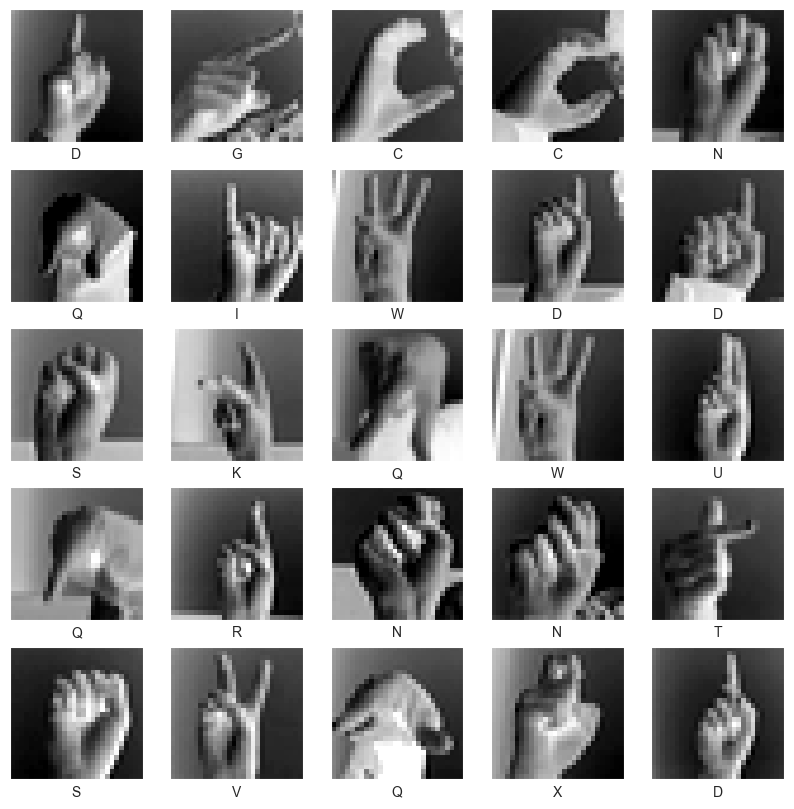

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    original_label_index = np.argmax(y_train[i])
    plt.xlabel(class_names[original_label_index])
plt.show()

# Model Training & Experimenting

> In this section i will train diffrent models starting with traditional Model which is Random Forest then a baseline NN and then start to experiment new changes
* I will Run all the NN models with 20 Epochs
* I will track excution time by using the fonction `time()` throughout NN models

## Baseline Model

> First, I started by training a `RandomForestClassifier` as one of the traditional models then to evaluate its performance. This helped in determining that using a neural network would be a better option in our case.


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model0 = RandomForestClassifier(n_estimators=100, random_state=42)
model0.fit(X_train_flat, train_label)

y_pred_rf = model0.predict(X_test_flat)
accuracy_rf = accuracy_score(test_label, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")


Random Forest Accuracy: 0.8163692136084774


* As I observed, the accuracy of the Random Forest model, is not as high as we're looking for. Therefore, using a neural network will be a more  effective approach in this case.

## 1st Experiment

> To start i created a basic baseline model that contains only 3 layers which are
* Flatten and 2 dense layer

> Using `Adam` as an optimizer and calculating the loss with `CategoricalCrossentropy`


In [ ]:
Model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24,activation='softmax')
],name="Model1")
Model1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

start_train_time = time.time()

history1=Model1.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test))
end_train_time = time.time()
training_time1 = end_train_time - start_train_time

/Users/macos/Desktop/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2518 - loss: 2.5831 - val_accuracy: 0.5007 - val_loss: 1.6734
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6001 - loss: 1.3508 - val_accuracy: 0.5979 - val_loss: 1.2831
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6987 - loss: 1.0158 - val_accuracy: 0.5839 - val_loss: 1.2925
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7633 - loss: 0.8052 - val_accuracy: 0.6205 - val_loss: 1.1603
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8067 - loss: 0.6759 - val_accuracy: 0.6334 - val_loss: 1.1453
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8421 - loss: 0.5607 - val_accuracy: 0.6655 - val_loss: 1.0764
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8607 - loss: 0.4880 - val_accuracy: 0.6835 - val_loss: 1.0548
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8918 - loss: 0.3964 - val_accuracy: 0.

In [ ]:
Model1.summary()

Model: "Model1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,730 (1.19 MB)

 Trainable params: 103,576 (404.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 207,154 (809.20 KB)

>Conclusion for the first model:
* The model has 103,576 total parameters to learn.
* The validation accuracy was 0.6999.

This indicates that the model likely needs additional layers and extensive hyperparameter tuning to improve its performance.

## 2nd Experiment

> As a second Model i used Convolutional Neural Networks Structure with:
* convolution filters: **2 Conv2D Layers**
* max pooling : **2 MaxPooling2D Layer**(with ReLu activation)
* Flattens the 2D feature maps into a 1D vector : **1 Flatten Layer**
* **1 Dropout layer** of 50%
* **1 Dense Layer** with Softmax activation

> Using `Adam` as an optimizer and calculating the loss with `CategoricalCrossentropy`

> Using a `batch_size` of 32

In [ ]:
model2 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model2"
)
model2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history2=model2.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time2 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.4174 - loss: 2.0127 - val_accuracy: 0.8335 - val_loss: 0.5629
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.8849 - loss: 0.3668 - val_accuracy: 0.8914 - val_loss: 0.3661
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9428 - loss: 0.1774 - val_accuracy: 0.9120 - val_loss: 0.2899
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9706 - loss: 0.1006 - val_accuracy: 0.9154 - val_loss: 0.2902
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9769 - loss: 0.0759 - val_accuracy: 0.9370 - val_loss: 0.2437
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9849 - loss: 0.0530 - val_accuracy: 0.9381 - val_loss: 0.2658
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9839 - loss: 0.0473 - val_accuracy: 0.9420 - val_loss: 0.2683
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9902 - loss: 0.0328 - 

In [ ]:
model2.summary()

Model: "Model2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 24)             │        38,424 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,722 (670.79 KB)

 Trainable params: 57,240 (223.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 114,482 (447.20 KB)

As a conclusion to this Model

* it has 57,240 total parameter to learn
* The `val_accuracy` was 0.9431 so CNN Structure already way better then the Last one

## 3rd Experiment

> Here i used the same Model as before but i changed the optimizer to `RMSprop()` to see if it will give a better or a worse result

In [ ]:
model3 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model3"
)
model3.compile(optimizer=RMSprop(),#changed
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history3=model3.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time3 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.3619 - loss: 2.1766 - val_accuracy: 0.7928 - val_loss: 0.6849
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.8609 - loss: 0.4333 - val_accuracy: 0.8784 - val_loss: 0.3643
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9367 - loss: 0.1910 - val_accuracy: 0.9154 - val_loss: 0.2787
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9645 - loss: 0.1122 - val_accuracy: 0.9084 - val_loss: 0.2915
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9759 - loss: 0.0729 - val_accuracy: 0.9327 - val_loss: 0.2385
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9819 - loss: 0.0526 - val_accuracy: 0.9268 - val_loss: 0.2852
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.9875 - loss: 0.0400 - val_accuracy: 0.9335 - val_loss: 0.2713
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9866 - loss: 0.0375 - 

In [ ]:
model3.summary()

Model: "Model3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │        38,424 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,482 (447.20 KB)

 Trainable params: 57,240 (223.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,242 (223.61 KB)

* As i can see, using `RMSprop()` did not yield better results, so I will stick with the `adam` optimizer.

## 4th Experiment

> Next, I wanted to add more complexity to the model by Adding one `Conv2D` and one `MaxPooling2D` layer.

>Additionally, I added `BatchNormalization()` between each `Conv2D` and `MaxPooling2D` layer for a faster convergence and potentially better performances

In [ ]:
model4 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),#Added
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),#Added
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),#added
        BatchNormalization(),#added
        layers.MaxPooling2D(pool_size=(2, 2)),#added
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model4"
)
model4.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history4=model4.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time4 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6386 - loss: 1.3497 - val_accuracy: 0.8707 - val_loss: 0.4053
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9818 - loss: 0.0694 - val_accuracy: 0.8653 - val_loss: 0.4283
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.9900 - loss: 0.0370 - val_accuracy: 0.8599 - val_loss: 0.4089
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9960 - loss: 0.0181 - val_accuracy: 0.8879 - val_loss: 0.4166
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9881 - loss: 0.0362 - val_accuracy: 0.9142 - val_loss: 0.2788
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9942 - loss: 0.0192 - val_accuracy: 0.9392 - val_loss: 0.2094
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.8865 - val_loss: 0.4539
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 31s 36ms/step - accuracy: 0.9924 - loss: 0.0241 - 

In [ ]:
model4.summary()

Model: "Model4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,098 (1.10 MB)

 Trainable params: 96,216 (375.84 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 192,434 (751.70 KB)

* The results are somewhat similar to the previous ones, but now I have more trainable parameters (96,216) to work with, which should help achieve better results.

## 5th Experiment

* In the model, I adjusted the dropouts to improve performance.

>I added a dropout of 20% in the middle of the model and decreased the last dropout from 50% to 20%, as i think 50% might be too high in this case

In [ ]:
model5 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Dropout(0.2),#added
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),#decrease to 0.2
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model5")


model5.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history5=model5.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time5 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 46s 46ms/step - accuracy: 0.7523 - loss: 0.9136 - val_accuracy: 0.8939 - val_loss: 0.3466
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 35s 41ms/step - accuracy: 0.9928 - loss: 0.0291 - val_accuracy: 0.9123 - val_loss: 0.2452
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9952 - loss: 0.0199 - val_accuracy: 0.9310 - val_loss: 0.2370
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 34s 39ms/step - accuracy: 0.9974 - loss: 0.0104 - val_accuracy: 0.9108 - val_loss: 0.2835
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 36s 42ms/step - accuracy: 0.9984 - loss: 0.0077 - val_accuracy: 0.8816 - val_loss: 0.3846
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 37s 43ms/step - accuracy: 0.9959 - loss: 0.0138 - val_accuracy: 0.9413 - val_loss: 0.1638
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9965 - loss: 0.0118 - val_accuracy: 0.8613 - val_loss: 0.4865
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.9963 - loss: 0.0125 - 

In [ ]:
model5.summary()

Model: "Model5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,098 (1.10 MB)

 Trainable params: 96,216 (375.84 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 192,434 (751.70 KB)

Now i have my best model so far with a` val_accuracy` of 0.9533 with the same Trainable Parameters

## 6th Experiment

> Now i wanted to change the structure a bit to see how the results reacts

* Instead of filtering with `Conv2D` from **32** to **128** i wanted to try the opposite way which is going from the biggest number to the smaller i will choose **75** **50** and then **25**

In [ ]:
model6 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(75, kernel_size=(3, 3), activation="relu"),#change the filtring to 75
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(50, kernel_size=(3, 3), activation="relu"),#change the filtring to 50
        layers.Dropout(0.2),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(25, kernel_size=(3, 3), activation="relu"),#change the filtring to 25
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model6")


model6.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history6=model6.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time6 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.5049 - loss: 1.7241 - val_accuracy: 0.7303 - val_loss: 0.8913
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 51s 59ms/step - accuracy: 0.9393 - loss: 0.2272 - val_accuracy: 0.8123 - val_loss: 0.5521
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 49s 57ms/step - accuracy: 0.9724 - loss: 0.1048 - val_accuracy: 0.8243 - val_loss: 0.5240
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.9792 - loss: 0.0727 - val_accuracy: 0.9042 - val_loss: 0.3014
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 54s 63ms/step - accuracy: 0.9808 - loss: 0.0612 - val_accuracy: 0.8643 - val_loss: 0.3793
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 72s 52ms/step - accuracy: 0.9870 - loss: 0.0416 - val_accuracy: 0.7393 - val_loss: 1.1647
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 51s 60ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.8196 - val_loss: 0.5835
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9875 - loss: 0.0419 - 

* Changing the output filter resulted a slightly lower validation accuracy, but overall the performances remained nearly the same

## 7th Experiment

>Here i wanted to tweak the hyperparameters of Conv2D and MaxPooling2D
* I put for the `Conv2D` a **stride** of **1** and **padding** at **'same'** means padding the input so that the output has the same width and height as the original input

* I put for the `MaxPooling2D` a **stride** of **2** and **padding** at **'same'**

In [ ]:
model7 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(75, kernel_size=(3, 3), strides = 1 , padding = 'same', activation="relu"),#change the value of stride and padding
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),#change the value of stride and padding
        layers.Conv2D(50, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),#change the value of stride and padding
        layers.Dropout(0.2),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),#change the value of stride and padding
        layers.Conv2D(25, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),#change the value of stride and padding
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),#change the value of stride and padding
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model7")


model7.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history7=model7.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time7 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.6409 - loss: 1.2915 - val_accuracy: 0.9269 - val_loss: 0.2549
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 78s 90ms/step - accuracy: 0.9898 - loss: 0.0446 - val_accuracy: 0.9368 - val_loss: 0.2210
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 66s 77ms/step - accuracy: 0.9958 - loss: 0.0180 - val_accuracy: 0.6605 - val_loss: 1.2874
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 71s 83ms/step - accuracy: 0.9943 - loss: 0.0202 - val_accuracy: 0.9603 - val_loss: 0.1442
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9598 - val_loss: 0.1551
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.9487 - val_loss: 0.1649
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 70s 81ms/step - accuracy: 0.9979 - loss: 0.0078 - val_accuracy: 0.9557 - val_loss: 0.1751
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.9964 - loss: 0.0104 - 

> it looks like i've already got the best Model so far with a validation accuracy of 0.9628

## 8th Experiment

> Here i wanted to add a new **Dense layer **of **512** units with an activation of **ReLu** after flatten the previews layers
* This layer can capture more complex patterns from the flattened outputs of the previous layers

> increase the last drop down with **10%** (now its 30%)

In [ ]:
model8 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(75, kernel_size=(3, 3), strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(50, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        layers.Dropout(0.2),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(25, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Flatten(),
        Dense(units = 512 , activation = 'relu'),#added
        layers.Dropout(0.3),#adding 10% drop down
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model8")



model8.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history8=model8.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test))
end_train_time = time.time()
training_time8 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 87s 94ms/step - accuracy: 0.7421 - loss: 0.8793 - val_accuracy: 0.9342 - val_loss: 0.2264
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 73s 85ms/step - accuracy: 0.9915 - loss: 0.0265 - val_accuracy: 0.9334 - val_loss: 0.2273
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9127 - val_loss: 0.3132
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 79s 92ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9073 - val_loss: 0.3942
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - accuracy: 0.9958 - loss: 0.0142 - val_accuracy: 0.9671 - val_loss: 0.1635
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.9945 - loss: 0.0225 - val_accuracy: 0.9257 - val_loss: 0.3056
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 74s 86ms/step - accuracy: 0.9939 - loss: 0.0213 - val_accuracy: 0.9573 - val_loss: 0.1953
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9992 - loss: 0.0031 - 

In [ ]:
model8.summary()

Model: "Model8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 75)     │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 75)     │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 75)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 50)     │        33,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 14, 14, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 7, 7, 25)       │        11,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 7, 7, 25)       │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 4, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791,549 (3.02 MB)

 Trainable params: 263,749 (1.01 MB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 527,500 (2.01 MB)

* The model has a slightly lower validation accuracy comparing to the previous one, but now after the add of the the new Dense layer I have more trainable parameters to work with which is totaling 263,749

## 9th Experiment

> add a `learning_rate_reduction` to reduce the learning rate when a metric has stopped improving
* `patience=2`: to specify the Number of Epochs without improvement after which the learning rate will be reduced
* `verbose=1`: the callback will print a message whenever the learning rate is reduced
* `factor=0.5`: the learning rate will be halved whenever the condition is met
* `min_lr=0.00001`: the minimum learning rate


In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model9 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(75, kernel_size=(3, 3), strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(50, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        layers.Dropout(0.2),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(25, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Flatten(),
        Dense(units = 512 , activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model9")


model9.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history9=model9.fit(X_train, y_train, batch_size=32,epochs=20, validation_data=(X_test, y_test),callbacks = [learning_rate_reduction])
end_train_time = time.time()
training_time9 = end_train_time - start_train_time

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 79s 86ms/step - accuracy: 0.7442 - loss: 0.8650 - val_accuracy: 0.9182 - val_loss: 0.2481 - learning_rate: 0.0010
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 74s 86ms/step - accuracy: 0.9943 - loss: 0.0215 - val_accuracy: 0.6895 - val_loss: 1.2406 - learning_rate: 0.0010
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9920 - loss: 0.0309
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
858/858 ━━━━━━━━━━━━━━━━━━━━ 78s 91ms/step - accuracy: 0.9920 - loss: 0.0309 - val_accuracy: 0.7712 - val_loss: 0.7983 - learning_rate: 0.0010
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 70s 82ms/step - accuracy: 0.9983 - loss: 0.0048 - val_accuracy: 0.9626 - val_loss: 0.0986 - learning_rate: 5.0000e-04
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 79s 91ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9520 - val_loss: 0.2047 - learning_rate: 5.0000e-04
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.99

* Adding a learning rate reduction caused a slight improvement in performance.

## 10th Experiment


> Increase **The Batch Size**  to **128** for a faster training and better convergence and generalization

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model10 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(75, kernel_size=(3, 3), strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(50, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        layers.Dropout(0.2),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(25, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Flatten(),
        Dense(units = 512 , activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model10")

model10.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history10=model10.fit(X_train, y_train, batch_size=128,epochs=20, validation_data=(X_test, y_test), callbacks = [learning_rate_reduction])#change the batchsize to 128
end_train_time = time.time()
training_time10 = end_train_time - start_train_time

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 74s 320ms/step - accuracy: 0.6298 - loss: 1.2959 - val_accuracy: 0.0864 - val_loss: 3.2506 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 67s 313ms/step - accuracy: 0.9942 - loss: 0.0259 - val_accuracy: 0.6472 - val_loss: 1.0748 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 67s 309ms/step - accuracy: 0.9990 - loss: 0.0070 - val_accuracy: 0.9402 - val_loss: 0.2093 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 72s 333ms/step - accuracy: 0.9994 - loss: 0.0051 - val_accuracy: 0.9631 - val_loss: 0.1299 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 72s 336ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9523 - val_loss: 0.1474 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 69s 319ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9699 - val_loss: 0.1192 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 70s 325ms/step - accuracy: 1.0

* Increasing the batch size improved the validation score and made the computation faster

## 11th Experiment

> Using The data Augmentation `(datagen)` technique that i create it in the preprocessing fase, usually  this technique lead to a better result because it will lead to  :
* Increase the training data
* Improve Generalization
* Better Performance on Test Data

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

model11 = models.Sequential(
    [
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(75, kernel_size=(3, 3), strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(50, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        layers.Dropout(0.2),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Conv2D(25, kernel_size=(3, 3),  strides = 1 , padding = 'same', activation="relu"),
        BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2), strides = 2 , padding = 'same'),
        layers.Flatten(),
        Dense(units = 512 , activation = 'relu'),
        layers.Dropout(0.3),
        layers.Dense(len(class_names), activation="softmax"),
    ],name="Model11")

model11.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
start_train_time = time.time()

history11=model11.fit(datagen.flow(X_train,y_train, batch_size = 128) ,epochs=20, validation_data=(X_test, y_test), callbacks = [learning_rate_reduction])#change the batchsize to 128
end_train_time = time.time()
training_time11 = end_train_time - start_train_time

Epoch 1/20


/Users/macos/Desktop/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 85s 372ms/step - accuracy: 0.4674 - loss: 1.8041 - val_accuracy: 0.0837 - val_loss: 3.4141 - learning_rate: 0.0010
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 71s 328ms/step - accuracy: 0.9172 - loss: 0.2467 - val_accuracy: 0.5994 - val_loss: 1.0872 - learning_rate: 0.0010
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 71s 327ms/step - accuracy: 0.9643 - loss: 0.1121 - val_accuracy: 0.9749 - val_loss: 0.0921 - learning_rate: 0.0010
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 72s 334ms/step - accuracy: 0.9795 - loss: 0.0654 - val_accuracy: 0.8978 - val_loss: 0.2584 - learning_rate: 0.0010
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 72s 286ms/step - accuracy: 0.9824 - loss: 0.0522 - val_accuracy: 0.9824 - val_loss: 0.0436 - learning_rate: 0.0010
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 73s 339ms/step - accuracy: 0.9876 - loss: 0.0356 - val_accuracy: 0.8691 - val_loss: 0.3750 - learning_rate: 0.0010
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.9901 - loss: 

* Indeed, data augmentation provided the best results, achieving a validation score of 0.9976. I will use this model for the validation test phase.

# Results of The Experiments

## A fonction to evaluate the Modules

> Here i created a Helper fonction that help me printing :
* The Name of the Model   
* Time that each Model take
* The test accuracy
* The Overall loss

With those steps:
* Converts the test data into a TensorFlow dataset and use batch size of 32
* Defines the loss and accuracy  function
* A helper function to format the training time from seconds into a minutes and second
* `Eval_mode` fonction will take care of :
 * Evaluates a given Keras model on a provided dataset (data_loader)
 * calculate the average loss and accuracy over all batches
 * Resets the accuracy metric state before starting evaluation
 * Update the loss and accuracy for each batch

In [ ]:

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
accuracy_fn = tf.keras.metrics.CategoricalAccuracy()

def format_time(seconds):
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes}:{seconds:02d}"


def eval_model(model: tf.keras.Model,
               data_loader: tf.data.Dataset,
               loss_fn: tf.keras.losses.Loss,
               accuracy_fn: tf.keras.metrics.Metric,
               training_time: float):

    loss = 0
    num_batches = 0
    accuracy_fn.reset_state()

    for X, y in data_loader:
        y_pred = model(X, training=False)
        batch_loss = loss_fn(y, y_pred)
        loss += batch_loss
        num_batches += 1
        accuracy_fn.update_state(y, y_pred)

    loss /= num_batches
    acc = accuracy_fn.result().numpy()

    return {"model_name": model.name,
            "model_loss": float(loss),
            "model_acc": float(acc),
            "execution_time": format_time(training_time)}

## Evaluate The Modules

> Here, I will call the helper function `eval_model` for each model and print out the results.

In [ ]:
model_results1 = eval_model(model=Model1,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn, training_time=training_time1)
model_results2 = eval_model(model=model2,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time2)
model_results3 = eval_model(model=model3,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time3)
model_results4 = eval_model(model=model4,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time4)
model_results5 = eval_model(model=model5,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time5)
model_results6 = eval_model(model=model6,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time6)
model_results7 = eval_model(model=model7,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time7)
model_results8 = eval_model(model=model8,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time8)
model_results9 = eval_model(model=model9,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time9)
model_results10 = eval_model(model=model10,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time10)
model_results11 = eval_model(model=model11,data_loader=test_dataset,loss_fn=loss_fn,accuracy_fn=accuracy_fn,training_time=training_time11)

print(model_results1)
print(model_results2)
print(model_results3)
print(model_results4)
print(model_results5)
print(model_results6)
print(model_results7)
print(model_results8)
print(model_results9)
print(model_results10)
print(model_results11)

2024-06-07 14:36:35.707130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-07 14:36:41.709704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-07 14:36:47.731469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-07 14:36:54.563861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-07 14:37:01.010336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-07 14:37:08.814252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-06-07 14:37:17.983302: W tensorflow/core/framework/local_rendezvous.cc:404] L

{'model_name': 'Model1', 'model_loss': 1.3496061563491821, 'model_acc': 0.6999441981315613, 'execution_time': '0:59'}
{'model_name': 'Model2', 'model_loss': 0.255657821893692, 'model_acc': 0.9431120753288269, 'execution_time': '7:19'}
{'model_name': 'Model3', 'model_loss': 0.28483477234840393, 'model_acc': 0.9385108947753906, 'execution_time': '7:23'}
{'model_name': 'Model4', 'model_loss': 0.2641814053058624, 'model_acc': 0.9375348687171936, 'execution_time': '10:26'}
{'model_name': 'Model5', 'model_loss': 0.15791307389736176, 'model_acc': 0.953290581703186, 'execution_time': '12:24'}
{'model_name': 'Model6', 'model_loss': 0.14783528447151184, 'model_acc': 0.9505019783973694, 'execution_time': '18:09'}
{'model_name': 'Model7', 'model_loss': 0.13101105391979218, 'model_acc': 0.9627718925476074, 'execution_time': '25:11'}
{'model_name': 'Model8', 'model_loss': 0.3645046055316925, 'model_acc': 0.9472950100898743, 'execution_time': '26:20'}
{'model_name': 'Model9', 'model_loss': 0.15671132

2024-06-07 14:38:01.521623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
compare_results = pd.DataFrame([model_results1, model_results2,model_results3, model_results4,model_results5, model_results6,model_results7, model_results8,model_results9, model_results10,model_results11])
compare_results

,model_name,model_loss,model_acc,execution_time
0,Model1,1.349606,0.699944,0:59
1,Model2,0.255658,0.943112,7:19
2,Model3,0.284835,0.938511,7:23
3,Model4,0.264181,0.937535,10:26
4,Model5,0.157913,0.953291,12:24
5,Model6,0.147835,0.950502,18:09
6,Model7,0.131011,0.962772,25:11
7,Model8,0.364505,0.947295,26:20
8,Model9,0.156711,0.955103,30:27
9,Model10,0.079808,0.976715,23:17


> after Looking at the results we can say that:

In terms of SPEED( The results was Computed with this specs 2.6 GHz 6-Core Intel Core i7):
* The faster Neuron Network was the Model 2 which was the basic Convolutional Neural Networks
* The more i've added the complixite to models the more calculations and time it needs which is understandable
* After adding the `learning_rate_reduction` to the Model 9 it makes it the slowest amongs the others, but after increasing the batch number in the model after it(Model 10) it makes it a bit faster

In terms of ACCURACY & LOSS
* The Basic first model was having a segnificant loss and low accuracy but starting from using the  Neural Networks  structure the result was started to get way better
* Using the Data augmentation on the last model had a segnificant impact to the dataset, while the other models didnt exceed 0.96, after data augmentation it reaches 0.997


> Here is a visualization of the models with their accuracy. We can see that the most accurate one was the final model (model11)

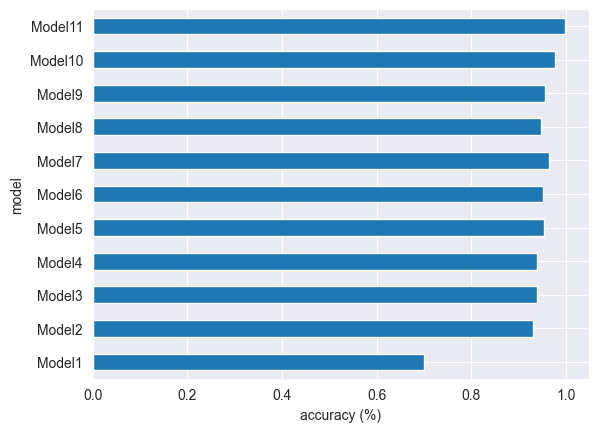

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

# Model Assessment

>After choosing the right model for our dataset, I need to assess its performance

In [ ]:
probability_model = tf.keras.Sequential([model11,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step


> I have created two helper functions to plot the `images` with their *corresponding characters* and the *predicted characters*, along with the `percentage` confidence of the model's predictions

> These functions does plot a chart that contains the `image` with the `labels` and their corresponding `percentages`. The predicted label is highlighted by the `BLUE`, and if the prediction is false, the correct label is shown by the `RED` color

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label = np.argmax(true_label[i])
  img = img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(24))
  plt.yticks([])
  thisplot = plt.bar(range(24), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

> I plotted 15 images to evaluate the model's predictions. All the random results were correct, and the outcomes look promising.

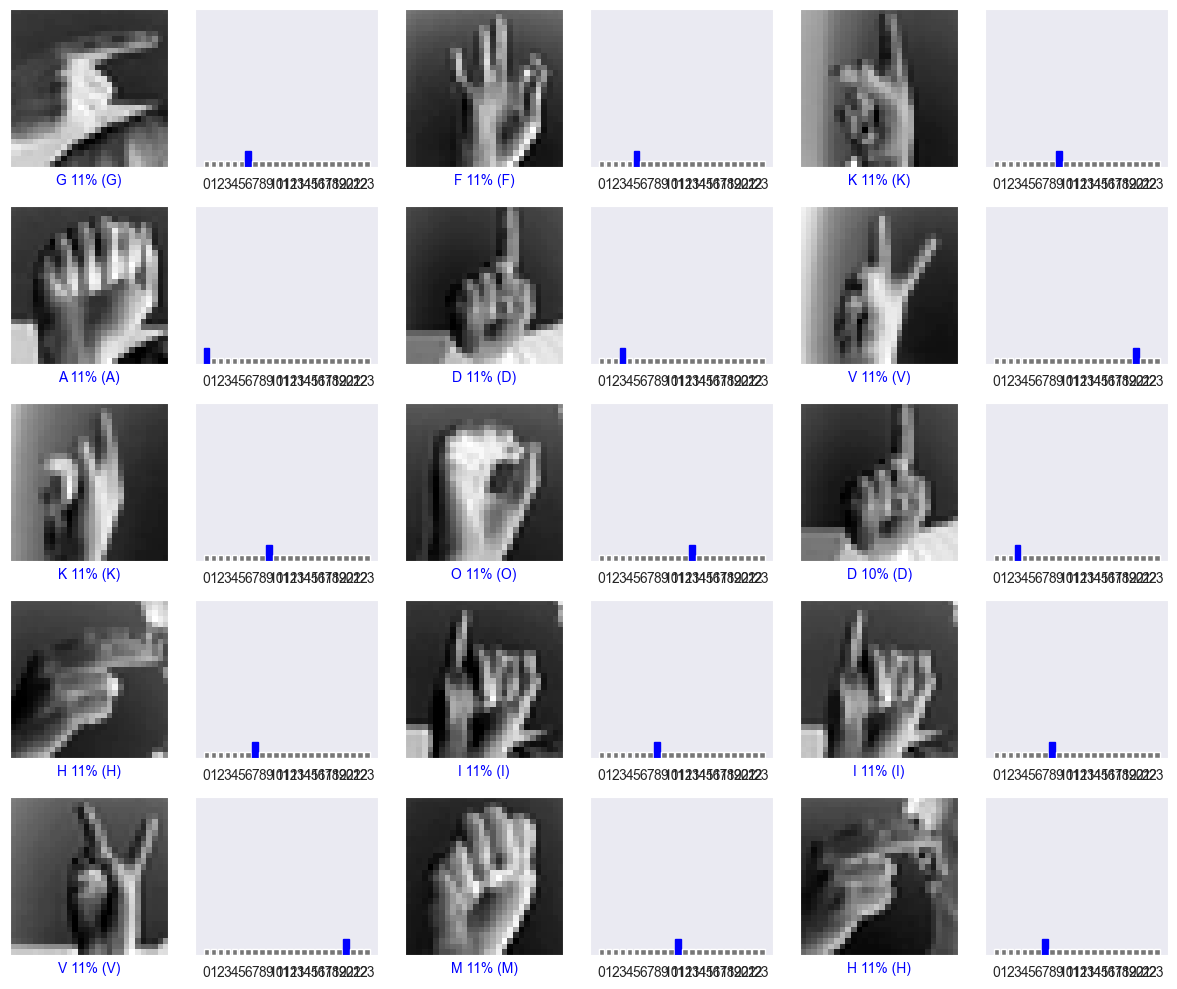

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

> I plotted the training history, showing the training vs validation loss and another plot for accuracy

* As I can see, after around 10 epochs, the results stabilized, with a few fluctuations after 5 epochs
* The validation loss and accuracy started from low accuracy predictions to very high accuracy after just two epochs

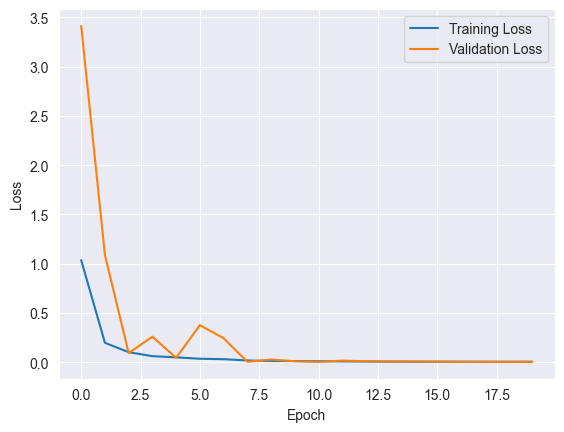

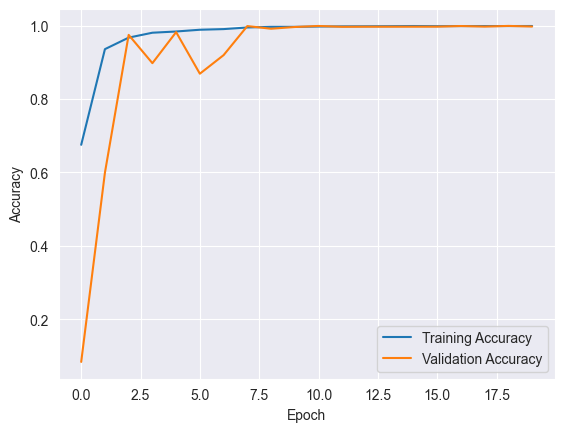

In [ ]:

def plot_training_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history11)

> Finally, I have plotted the confusion matrix here.

* 17 pictures of label 12 (M) were predicted as label 4 (D). Other than that, the model was perfect in predicting all the images correctly.

<Axes: >

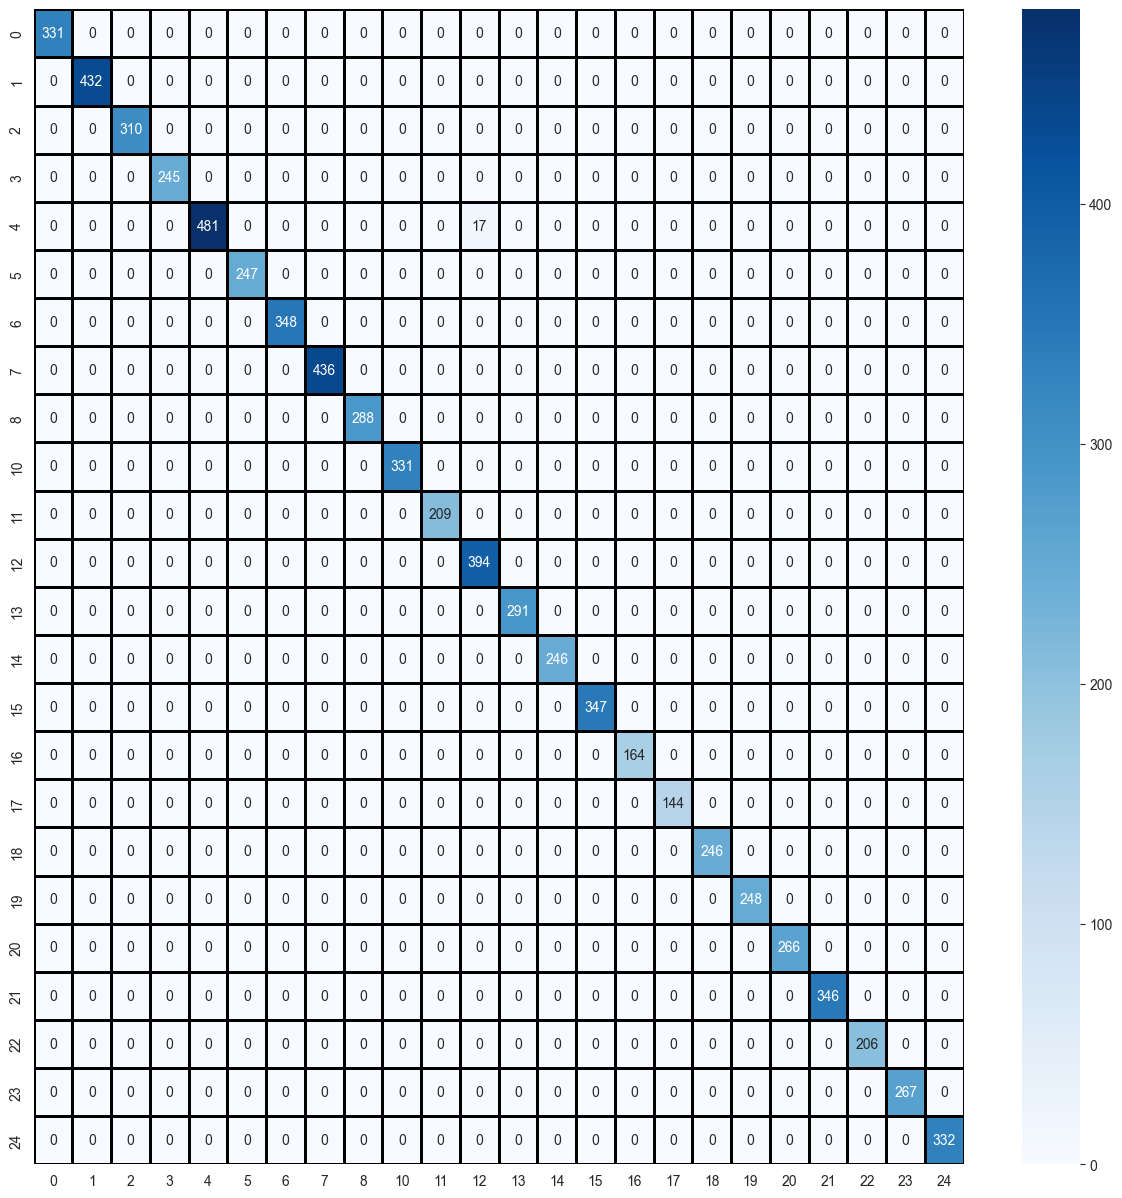

In [ ]:
for i in range(len(predictions)):
    if np.any(predictions[i] >= 9):
        predictions[i] += 1

cm = confusion_matrix(y_test.argmax(axis=1),predictions.argmax(axis=1))
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# Final Discussion

> The proposed shows significant strengts to improve CommuniSigns ASL recognition system by including comprehensive `preprocessing`, `data augmentation` and the use of `various neural network designs` with adjustments in hyperparameters and `learning rates` to increase `accuracy` and efficiency. However it does not cover gestures. Requires significant computing power. The outcomes suggest better precision and operational effectiveness which directly benefit the community served and enhance market competitiveness. Suggestions involve enlarging the dataset optimizing computing resources, introducing tools for clarity and ongoing enhancements. Key components include `layers`, `max pooling` layers and `dense` layers with dropout, for model understanding. Visualization techniques are applied to enhance model interpretability.
